<a id='top'></a>

## Apply Model to External Dataset and Subsets

**NOTE:** must already have a `subset_training_data_file` otherwise go to:   
***[Make Subset Dataset](#make_subset)***


### Notes:
* <b>Apr-04-2024: <i>Troubleshooting poor performance on external P3/human/bDNA dataset</i></b>
    * This was likely due to poor distribution of the data due to splitting data <u><b>by experiment</b></u>, but when resplit data <u><b>randomly ensuring similar efficacy distribution</b></u> (min/max/median/mean/Q1/Q3) saw similar performance on external dataset as on training dataset
    
    * See `datasets`:
        
        `ext_data_file` =   'new_input_data/external_sirna_screen_data_bdna-human-p3_643-sirnas_split-randomly_APR-04-2024_1UCN2.csv'
        `train_data_file1` = 'new_input_data/training_sirna_screen_data_bdna-human-p3_1930-sirnas_split-randomly_APR-04-2024_1UCN2.csv'
        `subset_training_data_file` = 'new_input_data/for_troubleshooting_and_testing/SUBSET-training_sirna_screen_data_bdna-human-p3_643-sirnas_split-randomly_APR-04-2024_1UCN2.csv'
        
    * See `output directory`: ***popt-rfN19761_rf_None_3-rounds_APR-4-2024***

        

In [1]:


## starting_input_data_file = 'new_input_data/compiled_all_sirna_screen_data_6247-sirnas|5449-bdna|798-dualglo_MAR-11-2024.csv'


############################################################################################
### Old datasets ###########################################################################

# train_data_file = 'new_input_data/training_sirna_screen_data_bdna-human-p3_1903-sirnas_MAR-21-2024.csv'
# ext_data_file = 'new_input_data/external_sirna_screen_data_bdna-human-p3_670-sirnas_MAR-21-2024.csv'

# # NOTE: would be renamed if run code in below box
# subset_training_data_file = 'new_input_data/for_troubleshooting_and_testing/SUBSET-training_sirna_screen_data_bdna-human-p3_670-sirnas_APR-02-2024.csv'


############################################################################################
# 1 - RESPLIT DATA - Randomly (by Efficacy Distribution) ###################################

ext_data_file =   'new_input_data/external_sirna_screen_data_bdna-human-p3_643-sirnas_split-randomly_APR-04-2024_1UCN2.csv'
train_data_file = 'new_input_data/training_sirna_screen_data_bdna-human-p3_1930-sirnas_split-randomly_APR-04-2024_1UCN2.csv'
# NOTE: would be renamed if run code in below box
subset_training_data_file = 'new_input_data/for_troubleshooting_and_testing/SUBSET-training_sirna_screen_data_bdna-human-p3_643-sirnas_split-randomly_APR-04-2024_1UCN2.csv'


#############################################################################################
# 2 - RESPLIT DATA - by Experiment ##########################################################

# ext_data_file =   'new_input_data/external_sirna_screen_data_bdna-human-p3_679-sirnas_split-by-exper_APR-04-2024_4ZJO7.csv'
# train_data_file = 'new_input_data/training_sirna_screen_data_bdna-human-p3_1894-sirnas_split-by-exper_APR-04-2024_4ZJO7.csv'
# # # NOTE: would be renamed if run code in below box
# subset_training_data_file = 'new_input_data/for_troubleshooting_and_testing/SUBSET-training_sirna_screen_data_bdna-human-p3_679-sirnas_split-by-exper_APR-04-2024_4ZJO7.csv'




# Build Initial Model with Entire Training Dataset
***(and apply to External Dataset)***

In [ ]:
from data_representation import DataRepresentationBuilder

drb = DataRepresentationBuilder(
    model_type__='random-forest',
    parameter_to_optimize__='None',
    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,
    custom_parameter_values_to_loop__=[],
    num_rerurun_model_building__=3,
    kmer_size__=9,
    flank_len__=20,

    encoding_ls__=[
        'one-hot',
        'bow-gensim-weights',
        'ann-word2vec-gensim-cbow',
        'ann-word2vec-gensim-skipgram',
        'ann-fasttext-skipgram',
        'ann-fasttext-cbow',
        'ann-fasttext-class-trained',
        # 'bow-countvect', # TODO: DEBUG there is something wrong, taking very long to run (infinite looping?)
    ],
    input_data_dir__ = 'new_input_data/',
    apply_final_models_to_external_dataset__ = True,
    

    input_data_file__ = train_data_file.replace('new_input_data/',''),
    #input_data_file__ = subset_training_data_file.replace('new_input_data/',''),
    #input_data_file__ = ext_data_file.replace('new_input_data/',''),
    
    external_data_file__ = ext_data_file.replace('new_input_data/',''),
    #external_data_file__ = subset_training_data_file.replace('new_input_data/',''),
    
    include_random_background_comparison__ = True,

    
)






IMPORTANT: run_param_optimization__ is set to (False) so will not be running parameter optimization(will only be building final models). Any mention of parameter optimization from Constructor can be ignored.






NOTE: running without optimizing any parameters






NOTE: parameter_to_optimize = (None) if this parameter was set in the input, it will be ignored!	 Instead will consider these parameter values: [ ]



Date set successfully! APR-4-2024

Creating processed datasets...

	 all_data_label_str_ = human_p3_bDNA_normalized_effco-25|ineffco-60-removed_undefined_siRNAs
	 abbrev_all_data_label_str_ = h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-rm-u
Creating processed datasets...
Successfully read in .csv data



Successfully read in - 1930 siRNAs
P3    1930
Name: chemical_scaffold, dtype: int64

bDNA    1930
Name: screen_type, dtype: int64

human    1930
Name: species, dtype: int64
Selecting data with screen type:
 ['bDNA']
Selecting data with speci

Read 0M words
Number of words:  42257
Number of labels: 0
Progress: 100.0% words/sec/thread:   19036 lr:  0.000000 avg.loss:  0.809905 ETA:   0h 0m 0s


encoding: ann-fasttext-cbow


Read 0M words
Number of words:  42257
Number of labels: 0
Progress: 100.0% words/sec/thread:   93607 lr:  0.000000 avg.loss:  2.620610 ETA:   0h 0m 0s


encoding: ann-fasttext-class-trained


Read 0M words
Number of words:  36664
Number of labels: 3
Progress: 100.0% words/sec/thread:  330634 lr:  0.000000 avg.loss:  1.102537 ETA:   0h 0m 0s




Encoded vector lengths:


one-hot	 bow-countvect	 bow-gensim	 bow-gensim-weights	 ann-keras	 ann-word2vec-gensim	 ann-word2vec-gensim-cbow	 ann-word2vec-gensim-skipgram	 ann-fasttext-cbow	 ann-fasttext-skipgram	 ann-fasttext-class-trained
240 	 54 		 120 		 120 		 120 		 120 		 120 		
240 	 54 		 120 		 120 		 120 		 120 		 120 		

Splitting Datasets into train/test/paramopt...
self.datasplit_id_ | Randomized 8-digit ID for this Set of Rounds:	 rfN52634
All datasets will be stored in:
 /Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimizationoutput_model_fitting/
	data-rfN52634_h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-rm-u/
Data processing parameter data appeneded to: 
	 output_model_fitting/data-processing-param-index.csv
Figure saved to: output_model_fitting/data-rfN52634_h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-rm-u/figur


Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 1 / 3...


Computing Final fbeta_score with beta = 0.5

Evaluating performance on Randomized (shuffled) Background Data for model 1 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 1 with encoding ann-word2vec-gensim-skipgram saved to: ~/

models/final_rf_model_rnd-1_w2vsg.pickle
Including additional evaluation on randomized background dataset

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 1 / 3...


Computing Final fbeta_score with beta = 0.5

Evaluating performance on Randomized (shuffled) Background Data for model 1 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 1 with encoding ann-fasttext-skipgram saved to: ~/

models/final_rf_model_rnd-1_annftxsg.pickle
Including additional evaluation on randomized background dataset

Computing Final fbeta_score with beta = 0.5

Evaluating performance on exte

# Build Initial Model with Entire Training Dataset
## INCLUDE MIDDLE VALUES IN TRAINING MODEL EVALUATION
***(and apply to External Dataset)***





IMPORTANT: run_param_optimization__ is set to (False) so will not be running parameter optimization(will only be building final models). Any mention of parameter optimization from Constructor can be ignored.






NOTE: running without optimizing any parameters






NOTE: parameter_to_optimize = (None) if this parameter was set in the input, it will be ignored!	 Instead will consider these parameter values: [ ]



Date set successfully! APR-4-2024

Creating processed datasets...

	 all_data_label_str_ = human_p3_bDNA_normalized_effco-25|ineffco-60-retained_undefined_siRNAs
	 abbrev_all_data_label_str_ = h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-kp-u
Creating processed datasets...
Successfully read in .csv data



Successfully read in - 1930 siRNAs
P3    1930
Name: chemical_scaffold, dtype: int64

bDNA    1930
Name: screen_type, dtype: int64

human    1930
Name: species, dtype: int64
Selecting data with screen type:
 ['bDNA']
Selecting data with spec

Read 0M words
Number of words:  42257
Number of labels: 0
Progress: 100.0% words/sec/thread:   13028 lr:  0.000000 avg.loss:  0.820585 ETA:   0h 0m 0s


encoding: ann-fasttext-cbow


Read 0M words
Number of words:  42257
Number of labels: 0
Progress: 100.0% words/sec/thread:   62492 lr:  0.000000 avg.loss:  2.612974 ETA:   0h 0m 0s


encoding: ann-fasttext-class-trained


Read 0M words
Number of words:  36664
Number of labels: 3
Progress: 100.0% words/sec/thread:  250296 lr:  0.000000 avg.loss:  1.102537 ETA:   0h 0m 0s




Encoded vector lengths:


one-hot	 bow-countvect	 bow-gensim	 bow-gensim-weights	 ann-keras	 ann-word2vec-gensim	 ann-word2vec-gensim-cbow	 ann-word2vec-gensim-skipgram	 ann-fasttext-cbow	 ann-fasttext-skipgram	 ann-fasttext-class-trained
240 	 54 		 120 		 120 		 120 		 120 		 120 		
240 	 54 		 120 		 120 		 120 		 120 		 120 		

Splitting Datasets into train/test/paramopt...
self.datasplit_id_ | Randomized 8-digit ID for this Set of Rounds:	 rfN26168
All datasets will be stored in:
 /Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimizationoutput_model_fitting/
	data-rfN26168_h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-kp-u/
Data processing parameter data appeneded to: 
	 output_model_fitting/data-processing-param-index.csv
Figure saved to: output_model_fitting/data-rfN26168_h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-kp-u/figur


Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 1 / 3...


Computing Final fbeta_score with beta = 0.5

Evaluating performance on Randomized (shuffled) Background Data for model 1 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 1 with encoding ann-fasttext-skipgram saved to: ~/

models/final_rf_model_rnd-1_annftxsg.pickle
Including additional evaluation on randomized background dataset

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 1 / 3...


Computing Final fbeta_score with beta = 0.5

Evaluating performance on Randomized (shuffled) Background Data for model 1 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 1 with encoding ann-fasttext-cbow saved to: ~/

models/final_rf_model_rnd-1_annftxcbow.pickle
Including additional evaluation on randomized background dataset

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external d

Figure saved to: output_model_fitting/popt-rfN62110_rf_None_3-rounds_APR-4-2024/figures/p-r_3-rnds_final_ext-data-eval_and-test-set.png

Curve plotting complete!

Plotting box plots from Final Model Building...

Plotting box plots from Final Model Building evaluated on External Dataset...

Plotting box plots -- per performance metric -- for final models...
Final Models Performance Metrics on Test Dataset Dataframe saved to:
	 output_model_fitting/popt-rfN62110_rf_None_3-rounds_APR-4-2024/data/performance_metrics_3-rnds_final_on-test-dataset_per-metric.csv
Final Models Performance Metrics (when Evaluated on External Dataset) Dataframe saved to:
	 output_model_fitting/popt-rfN62110_rf_None_3-rounds_APR-4-2024/data/performance_metrics_3-rnds_final_ext-data-eval_per-metric.csv
Final Models Performance Metrics (when Evaluated on Random Background Shuffled Dataset) Dataframe saved to:
	 output_model_fitting/popt-rfN62110_rf_None_3-rounds_APR-4-2024/data/performance_metrics_3-rnds_final_rando

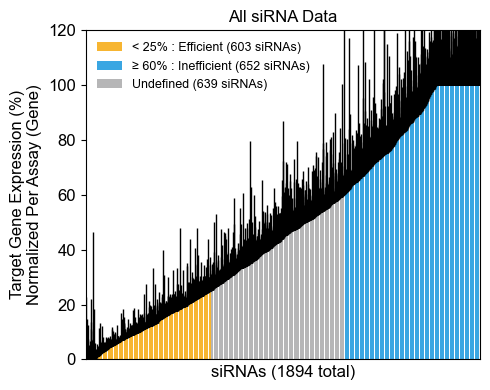

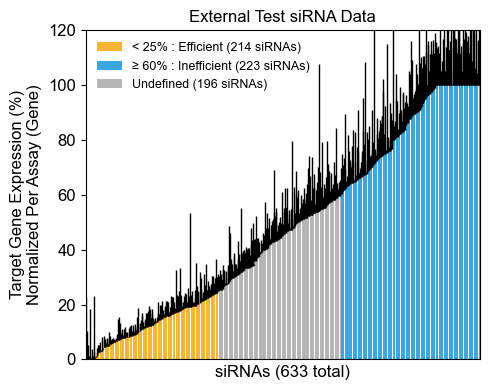

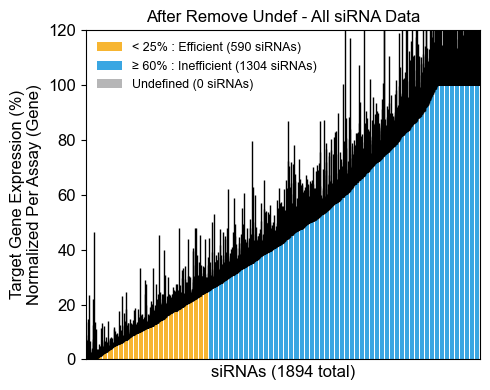

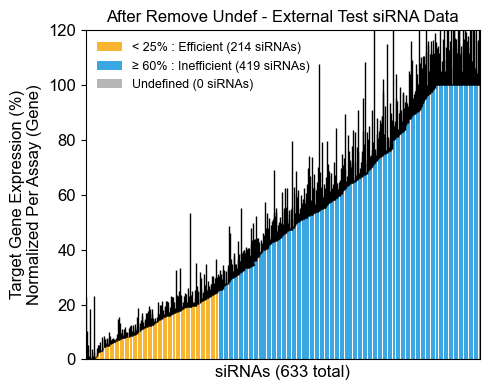

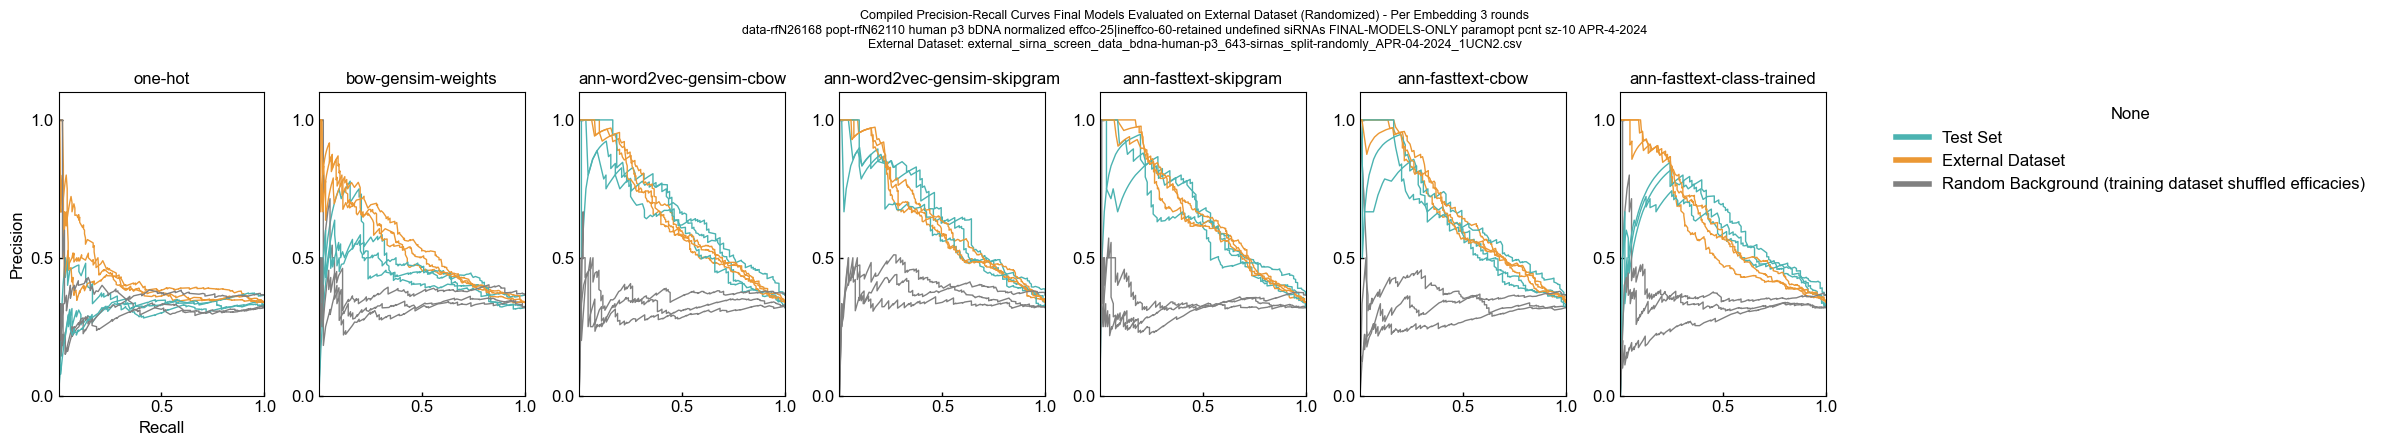

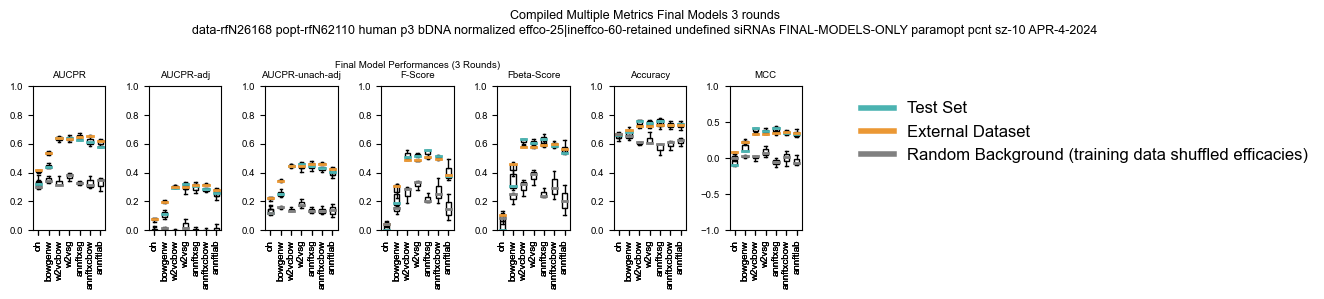

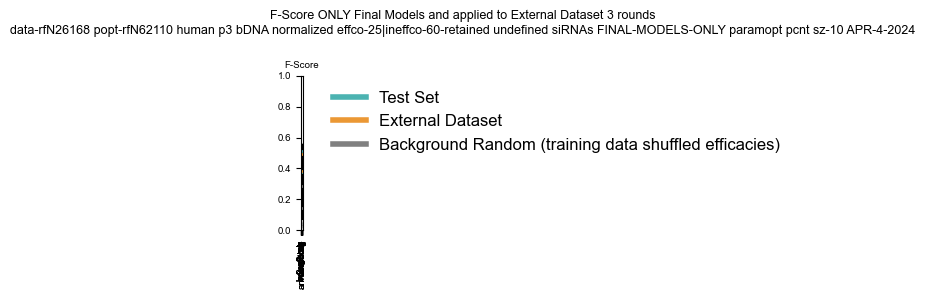

In [3]:
from data_representation import DataRepresentationBuilder

drb = DataRepresentationBuilder(
    model_type__='random-forest',
    parameter_to_optimize__='None',
    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,
    custom_parameter_values_to_loop__=[],
    num_rerurun_model_building__=3,
    kmer_size__=9,
    flank_len__=20,

    encoding_ls__=[
        'one-hot',
        'bow-gensim-weights',
        'ann-word2vec-gensim-cbow',
        'ann-word2vec-gensim-skipgram',
        'ann-fasttext-skipgram',
        'ann-fasttext-cbow',
        'ann-fasttext-class-trained',
        # 'bow-countvect', # TODO: DEBUG there is something wrong, taking very long to run (infinite looping?)
    ],
    input_data_dir__ = 'new_input_data/',
    apply_final_models_to_external_dataset__ = True,
    

    
    
    input_data_file__ = train_data_file.replace('new_input_data/',''),
    #input_data_file__ = subset_training_data_file.replace('new_input_data/',''),
    #input_data_file__ = ext_data_file.replace('new_input_data/',''),
    
    remove_undefined__ = False,
    
#     effco__=25, # 25, 
#     ineffco__=26, # 60,
    
    external_data_file__ = ext_data_file.replace('new_input_data/',''),
    #external_data_file__ = subset_training_data_file.replace('new_input_data/',''),
    
    include_random_background_comparison__ = True,

    
    
)



# Build Model with Smaller Training Dataset 
***(but same data - and apply to External Dataset)***




IMPORTANT: run_param_optimization__ is set to (False) so will not be running parameter optimization(will only be building final models). Any mention of parameter optimization from Constructor can be ignored.






NOTE: running without optimizing any parameters






NOTE: parameter_to_optimize = (None) if this parameter was set in the input, it will be ignored!	 Instead will consider these parameter values: [ ]



Date set successfully! APR-4-2024

Creating processed datasets...

	 all_data_label_str_ = human_p3_bDNA_normalized_effco-25|ineffco-60-removed_undefined_siRNAs
	 abbrev_all_data_label_str_ = h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-rm-u
Creating processed datasets...
Successfully read in .csv data



Successfully read in - 643 siRNAs
P3    643
Name: chemical_scaffold, dtype: int64

bDNA    643
Name: screen_type, dtype: int64

human    643
Name: species, dtype: int64
Selecting data with screen type:
 ['bDNA']
Selecting data with species:


Read 0M words
Number of words:  29106
Number of labels: 0
Progress: 100.0% words/sec/thread:   15663 lr:  0.000000 avg.loss:  1.345882 ETA:   0h 0m 0s


encoding: ann-fasttext-cbow


Read 0M words
Number of words:  29106
Number of labels: 0
Progress: 100.0% words/sec/thread:   81673 lr:  0.000000 avg.loss:  3.624557 ETA:   0h 0m 0s


encoding: ann-fasttext-class-trained


Read 0M words
Number of words:  18331
Number of labels: 3
Progress: 100.0% words/sec/thread:  337965 lr:  0.000000 avg.loss:  1.102534 ETA:   0h 0m 0s




Encoded vector lengths:


one-hot	 bow-countvect	 bow-gensim	 bow-gensim-weights	 ann-keras	 ann-word2vec-gensim	 ann-word2vec-gensim-cbow	 ann-word2vec-gensim-skipgram	 ann-fasttext-cbow	 ann-fasttext-skipgram	 ann-fasttext-class-trained
240 	 54 		 120 		 120 		 120 		 120 		 120 		
240 	 54 		 120 		 120 		 120 		 120 		 120 		

Splitting Datasets into train/test/paramopt...
self.datasplit_id_ | Randomized 8-digit ID for this Set of Rounds:	 rfN19052
All datasets will be stored in:
 /Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimizationoutput_model_fitting/
	data-rfN19052_h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-rm-u/
Data processing parameter data appeneded to: 
	 output_model_fitting/data-processing-param-index.csv
Figure saved to: output_model_fitting/data-rfN19052_h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-rm-u/figur


Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding one-hot saved to: ~/

models/final_rf_model_rnd-2_oh.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding bow-gensim-weights saved to: ~/

models/final_rf_model_rnd-2_bowgenw.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding ann-word2vec-gensim-cbow saved to: ~/

models/final_rf_model_rnd-2_w2vcbow.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding ann-word2vec-gensim-skipgram saved to: ~/


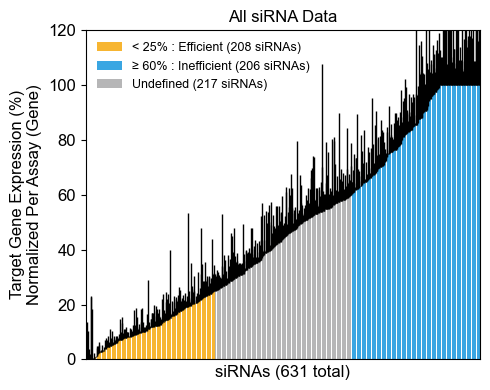

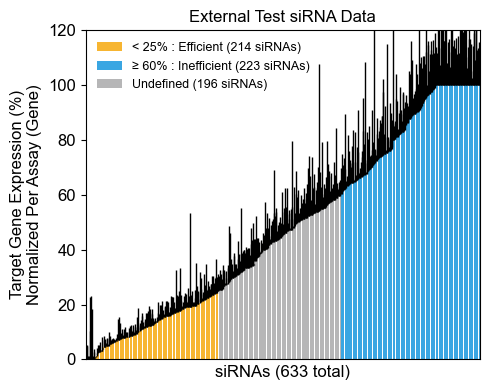

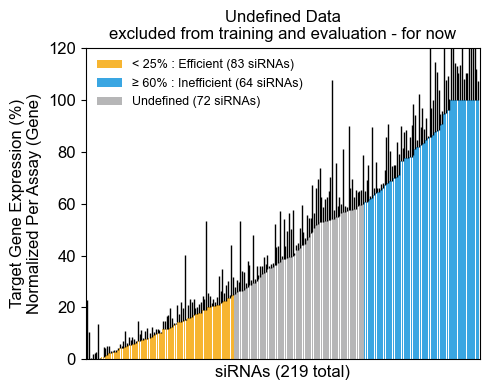

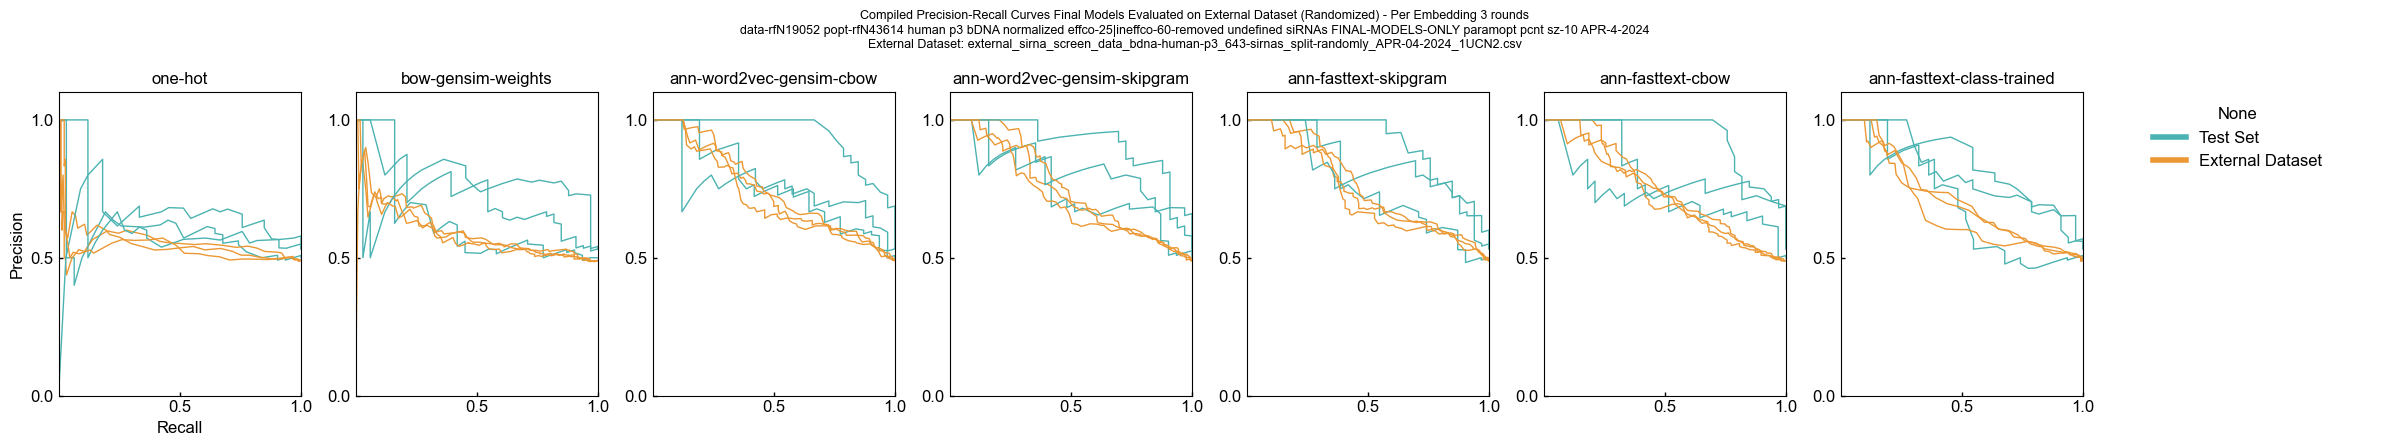

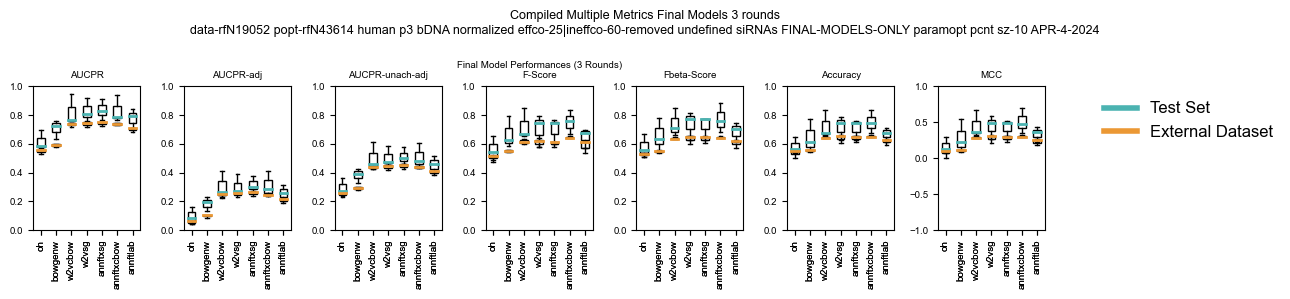

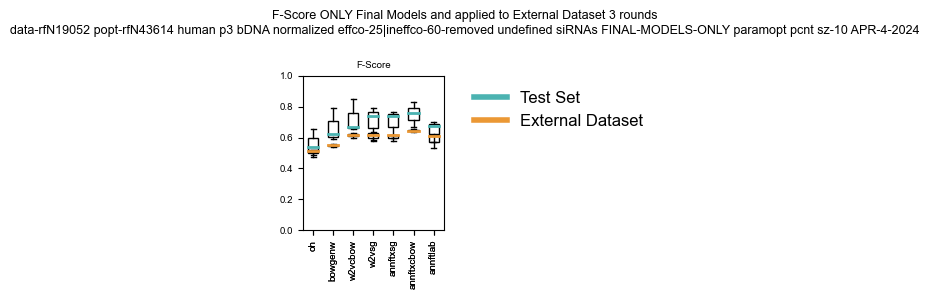

In [5]:
from data_representation import DataRepresentationBuilder

drb = DataRepresentationBuilder(
    model_type__='random-forest',
    parameter_to_optimize__='None',
    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,
    custom_parameter_values_to_loop__=[],
    num_rerurun_model_building__=3,
    kmer_size__=9,
    flank_len__=20,

    encoding_ls__=[
        'one-hot',
        'bow-gensim-weights',
        'ann-word2vec-gensim-cbow',
        'ann-word2vec-gensim-skipgram',
        'ann-fasttext-skipgram',
        'ann-fasttext-cbow',
        'ann-fasttext-class-trained',
        # 'bow-countvect', # TODO: DEBUG there is something wrong, taking very long to run (infinite looping?)
    ],
    input_data_dir__ = 'new_input_data/',
    apply_final_models_to_external_dataset__ = True,
    

    #input_data_file__ = train_data_file.replace('new_input_data/',''),
    input_data_file__ = subset_training_data_file.replace('new_input_data/',''),
    #input_data_file__ = ext_data_file.replace('new_input_data/',''),
    
    external_data_file__ = ext_data_file.replace('new_input_data/',''),
    #external_data_file__ = subset_training_data_file.replace('new_input_data/',''),

    
    include_random_background_comparison__ = True,
)



# Build Model with External Dataset 
***(and apply to Smaller Training Dataset)***




IMPORTANT: run_param_optimization__ is set to (False) so will not be running parameter optimization(will only be building final models). Any mention of parameter optimization from Constructor can be ignored.






NOTE: running without optimizing any parameters






NOTE: parameter_to_optimize = (None) if this parameter was set in the input, it will be ignored!	 Instead will consider these parameter values: [ ]



Date set successfully! APR-4-2024

Creating processed datasets...

	 all_data_label_str_ = human_p3_bDNA_normalized_effco-25|ineffco-60-removed_undefined_siRNAs
	 abbrev_all_data_label_str_ = h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-rm-u
Creating processed datasets...
Successfully read in .csv data



Successfully read in - 643 siRNAs
P3    643
Name: chemical_scaffold, dtype: int64

bDNA    643
Name: screen_type, dtype: int64

human    643
Name: species, dtype: int64
Selecting data with screen type:
 ['bDNA']
Selecting data with species:


Read 0M words
Number of words:  29106
Number of labels: 0
Progress: 100.0% words/sec/thread:   16906 lr:  0.000000 avg.loss:  1.292561 ETA:   0h 0m 0s


encoding: ann-fasttext-cbow


Read 0M words
Number of words:  29106
Number of labels: 0
Progress: 100.0% words/sec/thread:   92158 lr:  0.000000 avg.loss:  3.621879 ETA:   0h 0m 0s
Read 0M words
Number of words:  19323
Number of labels: 3


encoding: ann-fasttext-class-trained


Progress: 100.0% words/sec/thread:  335017 lr:  0.000000 avg.loss:  1.102534 ETA:   0h 0m 0s




Encoded vector lengths:


one-hot	 bow-countvect	 bow-gensim	 bow-gensim-weights	 ann-keras	 ann-word2vec-gensim	 ann-word2vec-gensim-cbow	 ann-word2vec-gensim-skipgram	 ann-fasttext-cbow	 ann-fasttext-skipgram	 ann-fasttext-class-trained
240 	 54 		 120 		 120 		 120 		 120 		 120 		
240 	 54 		 120 		 120 		 120 		 120 		 120 		

Splitting Datasets into train/test/paramopt...
self.datasplit_id_ | Randomized 8-digit ID for this Set of Rounds:	 rfN10874
All datasets will be stored in:
 /Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimizationoutput_model_fitting/
	data-rfN10874_h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-rm-u/
Data processing parameter data appeneded to: 
	 output_model_fitting/data-processing-param-index.csv
Figure saved to: output_model_fitting/data-rfN10874_h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-rm-u/figur


Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding one-hot saved to: ~/

models/final_rf_model_rnd-2_oh.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding bow-gensim-weights saved to: ~/

models/final_rf_model_rnd-2_bowgenw.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding ann-word2vec-gensim-cbow saved to: ~/

models/final_rf_model_rnd-2_w2vcbow.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding ann-word2vec-gensim-skipgram saved to: ~/


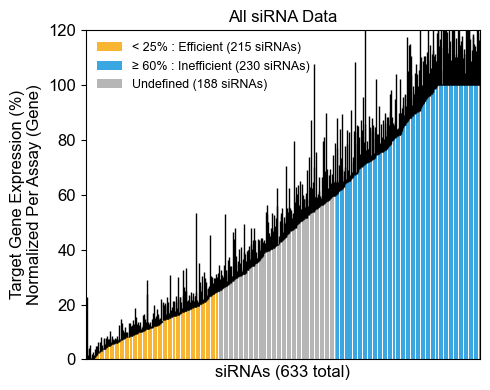

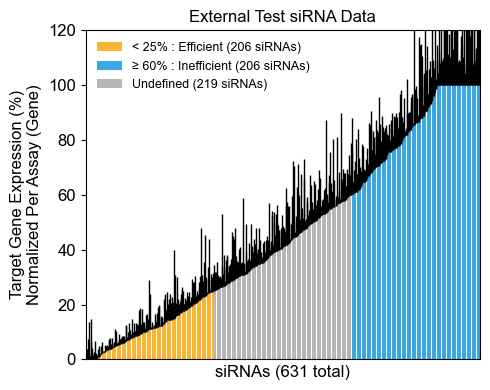

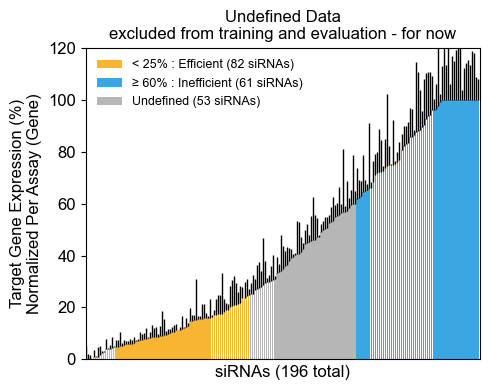

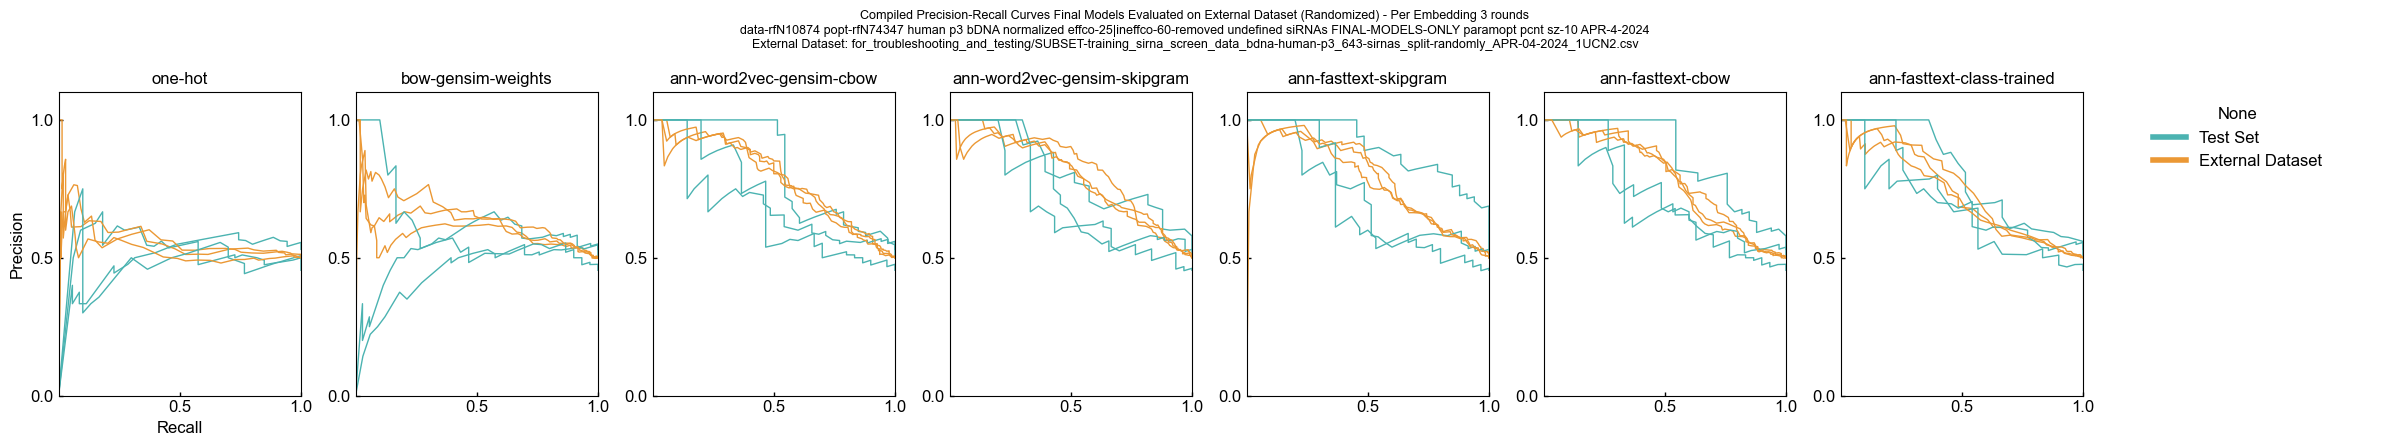

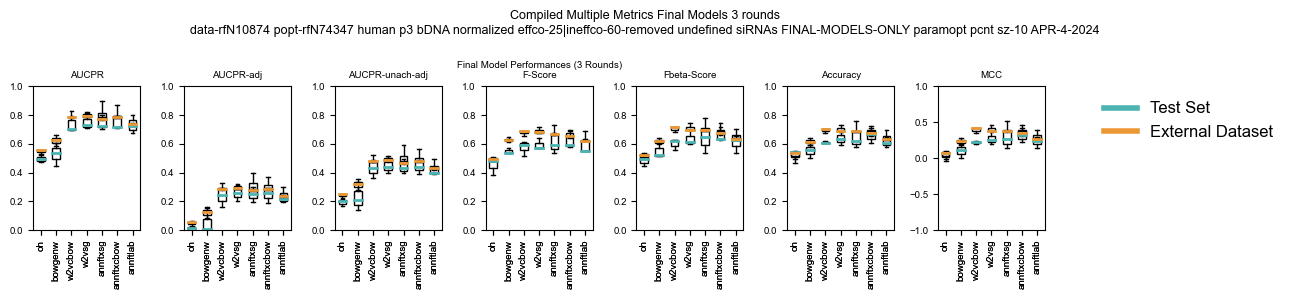

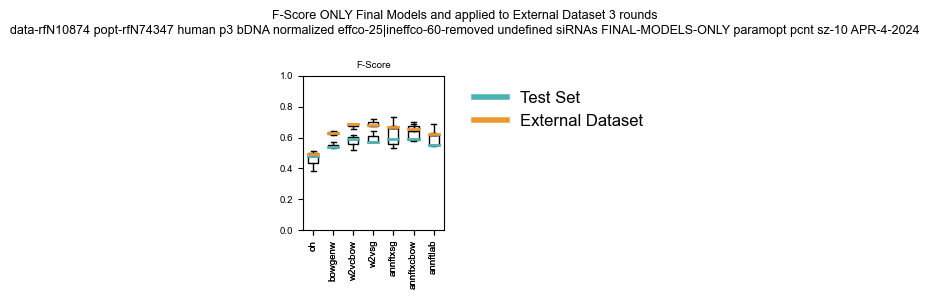

In [7]:
from data_representation import DataRepresentationBuilder

drb = DataRepresentationBuilder(
    model_type__='random-forest',
    parameter_to_optimize__='None',
    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,
    custom_parameter_values_to_loop__=[],
    num_rerurun_model_building__=3,
    kmer_size__=9,
    flank_len__=20,

    encoding_ls__=[
        'one-hot',
        'bow-gensim-weights',
        'ann-word2vec-gensim-cbow',
        'ann-word2vec-gensim-skipgram',
        'ann-fasttext-skipgram',
        'ann-fasttext-cbow',
        'ann-fasttext-class-trained',
        # 'bow-countvect', # TODO: DEBUG there is something wrong, taking very long to run (infinite looping?)
    ],
    input_data_dir__ = 'new_input_data/',
    apply_final_models_to_external_dataset__ = True,
    

    #input_data_file__ = train_data_file.replace('new_input_data/',''),
    #input_data_file__ = subset_training_data_file.replace('new_input_data/',''),
    input_data_file__ = ext_data_file.replace('new_input_data/',''),
    
    #external_data_file__ = ext_data_file.replace('new_input_data/',''),
    external_data_file__ = subset_training_data_file.replace('new_input_data/',''),

    
)



# Build Model with Smaller Training Dataset 
## INCLUDE MIDDLE VALUES IN TRAINING MODEL EVALUATION
***(but same data - and apply to External Dataset)***

In [ ]:
from data_representation import DataRepresentationBuilder

drb = DataRepresentationBuilder(
    model_type__='random-forest',
    parameter_to_optimize__='None',
    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,
    custom_parameter_values_to_loop__=[],
    num_rerurun_model_building__=3,
    kmer_size__=9,
    flank_len__=20,

    encoding_ls__=[
        'one-hot',
        'bow-gensim-weights',
        'ann-word2vec-gensim-cbow',
        'ann-word2vec-gensim-skipgram',
        'ann-fasttext-skipgram',
        'ann-fasttext-cbow',
        'ann-fasttext-class-trained',
        # 'bow-countvect', # TODO: DEBUG there is something wrong, taking very long to run (infinite looping?)
    ],
    input_data_dir__ = 'new_input_data/',
    apply_final_models_to_external_dataset__ = True,
    

    #input_data_file__ = train_data_file.replace('new_input_data/',''),
    input_data_file__ = subset_training_data_file.replace('new_input_data/',''),
    #input_data_file__ = ext_data_file.replace('new_input_data/',''),
    
    remove_undefined__ = False,
    
#     effco__=25, # 25, 
#     ineffco__=26, # 60,
    
    external_data_file__ = ext_data_file.replace('new_input_data/',''),
    #external_data_file__ = subset_training_data_file.replace('new_input_data/',''),

    
)



In [ ]:
from data_representation import DataRepresentationBuilder

drb = DataRepresentationBuilder(
    model_type__='random-forest',
    parameter_to_optimize__='None',
    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,
    custom_parameter_values_to_loop__=[],
    num_rerurun_model_building__=3,
    kmer_size__=9,
    flank_len__=20,

    encoding_ls__=[
        'one-hot',
        'bow-gensim-weights',
        'ann-word2vec-gensim-cbow',
        'ann-word2vec-gensim-skipgram',
        'ann-fasttext-skipgram',
        'ann-fasttext-cbow',
        'ann-fasttext-class-trained',
        # 'bow-countvect', # TODO: DEBUG there is something wrong, taking very long to run (infinite looping?)
    ],
    input_data_dir__ = 'new_input_data/',
    apply_final_models_to_external_dataset__ = True,
    

    #input_data_file__ = train_data_file.replace('new_input_data/',''),
    input_data_file__ = subset_training_data_file.replace('new_input_data/',''),
    #input_data_file__ = ext_data_file.replace('new_input_data/',''),
    
    remove_undefined__ = False,
    
    effco__=25, 
    ineffco__=60,
    
    external_data_file__ = ext_data_file.replace('new_input_data/',''),
    #external_data_file__ = subset_training_data_file.replace('new_input_data/',''),

    
)



# Build Model with External Dataset 
## INCLUDE MIDDLE VALUES IN TRAINING MODEL EVALUATION

***(and apply to Smaller Training Dataset)***

In [ ]:
from data_representation import DataRepresentationBuilder

drb = DataRepresentationBuilder(
    model_type__='random-forest',
    parameter_to_optimize__='None',
    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,
    custom_parameter_values_to_loop__=[],
    num_rerurun_model_building__=3,
    kmer_size__=9,
    flank_len__=20,

    encoding_ls__=[
        'one-hot',
        'bow-gensim-weights',
        'ann-word2vec-gensim-cbow',
        'ann-word2vec-gensim-skipgram',
        'ann-fasttext-skipgram',
        'ann-fasttext-cbow',
        'ann-fasttext-class-trained',
        # 'bow-countvect', # TODO: DEBUG there is something wrong, taking very long to run (infinite looping?)
    ],
    input_data_dir__ = 'new_input_data/',
    apply_final_models_to_external_dataset__ = True,
    

    #input_data_file__ = train_data_file.replace('new_input_data/',''),
    #input_data_file__ = subset_training_data_file.replace('new_input_data/',''),
    input_data_file__ = ext_data_file.replace('new_input_data/',''),
    
    remove_undefined__ = False,
    
    effco__=25, # 25, 
    ineffco__=26, # 60,
    
    
    #external_data_file__ = ext_data_file.replace('new_input_data/',''),
    external_data_file__ = subset_training_data_file.replace('new_input_data/',''),

    
)



# (TESTING) Build Model with Smaller Training Dataset 
***(and apply to same Smaller Training Dataset)***

In [ ]:
from data_representation import DataRepresentationBuilder

drb = DataRepresentationBuilder(
    model_type__='random-forest',
    parameter_to_optimize__='None',
    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,
    custom_parameter_values_to_loop__=[],
    num_rerurun_model_building__=3,
    kmer_size__=9,
    flank_len__=20,

    encoding_ls__=[
        'one-hot',
        'bow-gensim-weights',
        'ann-word2vec-gensim-cbow',
        'ann-word2vec-gensim-skipgram',
        'ann-fasttext-skipgram',
        'ann-fasttext-cbow',
        'ann-fasttext-class-trained',
        # 'bow-countvect', # TODO: DEBUG there is something wrong, taking very long to run (infinite looping?)
    ],
    input_data_dir__ = 'new_input_data/',
    apply_final_models_to_external_dataset__ = True,
    

    #input_data_file__ = train_data_file.replace('new_input_data/',''),
    input_data_file__ = subset_training_data_file.replace('new_input_data/',''),
    #input_data_file__ = ext_data_file.replace('new_input_data/',''),
    
    #external_data_file__ = ext_data_file.replace('new_input_data/',''),
    external_data_file__ = subset_training_data_file.replace('new_input_data/',''),

    
)



# (TESTING) Build Model with External Dataset 
***(and apply to same External Dataset)***

In [ ]:
from data_representation import DataRepresentationBuilder

drb = DataRepresentationBuilder(
    model_type__='random-forest',
    parameter_to_optimize__='None',
    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,
    custom_parameter_values_to_loop__=[],
    num_rerurun_model_building__=3,
    kmer_size__=9,
    flank_len__=20,

    encoding_ls__=[
        'one-hot',
        'bow-gensim-weights',
        'ann-word2vec-gensim-cbow',
        'ann-word2vec-gensim-skipgram',
        'ann-fasttext-skipgram',
        'ann-fasttext-cbow',
        'ann-fasttext-class-trained',
        # 'bow-countvect', # TODO: DEBUG there is something wrong, taking very long to run (infinite looping?)
    ],
    input_data_dir__ = 'new_input_data/',
    apply_final_models_to_external_dataset__ = True,
    

    #input_data_file__ = train_data_file.replace('new_input_data/',''),
    #input_data_file__ = subset_training_data_file.replace('new_input_data/',''),
    input_data_file__ = ext_data_file.replace('new_input_data/',''),
    
    external_data_file__ = ext_data_file.replace('new_input_data/',''),
    #external_data_file__ = subset_training_data_file.replace('new_input_data/',''),

    
)



# (TESTING) Build Model with Smaller Training Dataset 
### with closer eff/ineff THRESHOLDS
***(and apply to same Smaller Training Dataset)***

In [ ]:


from data_representation import DataRepresentationBuilder

drb = DataRepresentationBuilder(
    effco__=25, # 25, 
    ineffco__=26, # 60,
    
    model_type__='random-forest',
    parameter_to_optimize__='None',
    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,
    custom_parameter_values_to_loop__=[],
    num_rerurun_model_building__=3,
    kmer_size__=9,
    flank_len__=20,

    encoding_ls__=[
        'one-hot',
        'bow-gensim-weights',
        'ann-word2vec-gensim-cbow',
        'ann-word2vec-gensim-skipgram',
        'ann-fasttext-skipgram',
        'ann-fasttext-cbow',
        'ann-fasttext-class-trained',
        # 'bow-countvect', # TODO: DEBUG there is something wrong, taking very long to run (infinite looping?)
    ],
    input_data_dir__ = 'new_input_data/',
    apply_final_models_to_external_dataset__ = True,
    

    #input_data_file__ = train_data_file.replace('new_input_data/',''),
    input_data_file__ = subset_training_data_file.replace('new_input_data/',''),
    #input_data_file__ = ext_data_file.replace('new_input_data/',''),
    
    #external_data_file__ = ext_data_file.replace('new_input_data/',''),
    external_data_file__ = subset_training_data_file.replace('new_input_data/',''),

    
)



# Build Model with Training Dataset 
### with closer eff/ineff THRESHOLDS
***(and apply to External Dataset)***

In [ ]:

from data_representation import DataRepresentationBuilder

drb = DataRepresentationBuilder(
    effco__=25, # 25, 
    ineffco__=26, # 60,
    
    model_type__='random-forest',
    parameter_to_optimize__='None',
    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,
    custom_parameter_values_to_loop__=[],
    num_rerurun_model_building__=3,
    kmer_size__=9,
    flank_len__=20,

    encoding_ls__=[
        'one-hot',
        'bow-gensim-weights',
        'ann-word2vec-gensim-cbow',
        'ann-word2vec-gensim-skipgram',
        'ann-fasttext-skipgram',
        'ann-fasttext-cbow',
        'ann-fasttext-class-trained',
        # 'bow-countvect', # TODO: DEBUG there is something wrong, taking very long to run (infinite looping?)
    ],
    input_data_dir__ = 'new_input_data/',
    apply_final_models_to_external_dataset__ = True,
    

    input_data_file__ = train_data_file.replace('new_input_data/',''),
    #input_data_file__ = subset_training_data_file.replace('new_input_data/',''),
    #input_data_file__ = ext_data_file.replace('new_input_data/',''),
    
    external_data_file__ = ext_data_file.replace('new_input_data/',''),
    #external_data_file__ = subset_training_data_file.replace('new_input_data/',''),

    
)




<a id='make_subset'></a>
# Make Dataset of equal size to external dataset
* Better maintaining distribution (based on sampling rather than thresholds)

## [top](#top)

In [ ]:
import pandas as pd
import numpy as np

# train_data_file = 'new_input_data/training_sirna_screen_data_bdna-human-p3_1903-sirnas_MAR-21-2024.csv'
# ext_data_file = 'new_input_data/external_sirna_screen_data_bdna-human-p3_670-sirnas_MAR-21-2024.csv'


df_ext = pd.read_csv(ext_data_file)
df = pd.read_csv(train_data_file)

df_selected_ = df.sample(n=len(df_ext)).copy()##['expression_percent_normalized_by_max_min'].describe()
df_selected_

import numpy as np

data_distribution_df_ = pd.DataFrame([np.round(df['expression_percent_normalized_by_max_min'].describe(),2),
              np.round(df_selected_['expression_percent_normalized_by_max_min'].describe(),2)], 
             index = ['original_training','selected_training']).transpose()

data_distribution_df_['range'] = data_distribution_df_.apply(lambda x:max(x)-min(x),axis=1)
data_distribution_df_.at['count','range'] = np.nan


if np.any(data_distribution_df_['range'] > 2):
    display(data_distribution_df_[['range']])
    raise Exception("ERROR: at least one statistic in sampled data distributions is off by more than the set threshold, resplit data again!")
    
display(data_distribution_df_)


# PLOT DATA:
effco_=25 # just used for plotting here
ineffco_=60 # just used for plotting here

all_eff_indxs_ = list(df[df['expression_percent_normalized_by_max_min'] <= effco_].index)
all_ineff_indxs_ = list(df[df['expression_percent_normalized_by_max_min'] >= ineffco_].index)
all_undef_indxs_ = list(df[ (df['expression_percent_normalized_by_max_min'] > effco_) & 
                        (df['expression_percent_normalized_by_max_min'] < ineffco_)].index)

df['class'] = np.nan
for i in all_eff_indxs_:
    df.at[i,'class'] = 'efficient'
for i in all_ineff_indxs_:
    df.at[i,'class'] = 'inefficient'
for i in all_undef_indxs_:
    df.at[i,'class'] = 'undefined'
    

from matplotlib import pyplot as plt
fig, axs = plt.subplots(1,3)
fig.set_size_inches(w=15, h=4)

colors_ls_all = [x.replace('inefficient', '#3AA6E2').replace('efficient', '#F7B531').replace('undefined', '#B6B6B7') for
             x in list(df.sort_values(by='expression_percent_normalized_by_max_min')['class'])]
axs[0].bar(
    x=list(range(len(df))),
    height=df.sort_values(by='expression_percent_normalized_by_max_min')['expression_percent_normalized_by_max_min'],
    color = colors_ls_all,
)
axs[0].set_title('All Training Data\n('+str(len(df))+' siRNAs)')
axs[0].set_xlim(-1,len(df))


ext_eff_indxs_ = list(df_ext[df_ext['expression_percent_normalized_by_max_min'] <= effco_].index)
ext_ineff_indxs_ = list(df_ext[df_ext['expression_percent_normalized_by_max_min'] >= ineffco_].index)
ext_undef_indxs_ = list(df_ext[ (df_ext['expression_percent_normalized_by_max_min'] > effco_) & 
                        (df_ext['expression_percent_normalized_by_max_min'] < ineffco_)].index)

df_ext['class'] = np.nan
for i in ext_eff_indxs_:
    df_ext.at[i,'class'] = 'efficient'
for i in ext_ineff_indxs_:
    df_ext.at[i,'class'] = 'inefficient'
for i in ext_undef_indxs_:
    df_ext.at[i,'class'] = 'undefined'
    


colors_ls_ext = [x.replace('inefficient', '#3AA6E2').replace('efficient', '#F7B531').replace('undefined', '#B6B6B7') for
             x in list(df_ext.sort_values(by='expression_percent_normalized_by_max_min')['class'])]
axs[1].bar(
    x=list(range(len(df_ext))),
    height=df_ext.sort_values(by='expression_percent_normalized_by_max_min')['expression_percent_normalized_by_max_min'],
    color = colors_ls_ext,
)
axs[1].set_title('All External Data\n('+str(len(df_ext))+' siRNAs)')
axs[1].set_xlim(-1,len(df_ext))

selected_eff_indxs_ = list(df_selected_[df_selected_['expression_percent_normalized_by_max_min'] <= effco_].index)
selected_ineff_indxs_ = list(df_selected_[df_selected_['expression_percent_normalized_by_max_min'] >= ineffco_].index)
selected_undef_indxs_ = list(df_selected_[ (df_selected_['expression_percent_normalized_by_max_min'] > effco_) & 
                        (df_selected_['expression_percent_normalized_by_max_min'] < ineffco_)].index)

df_selected_['class'] = np.nan
for i in selected_eff_indxs_:
    df_selected_.at[i,'class'] = 'efficient'
for i in selected_ineff_indxs_:
    df_selected_.at[i,'class'] = 'inefficient'
for i in selected_undef_indxs_:
    df_selected_.at[i,'class'] = 'undefined'


colors_ls_sel = [x.replace('inefficient', '#3AA6E2').replace('efficient', '#F7B531').replace('undefined', '#B6B6B7') for
             x in list(df_selected_.sort_values(by='expression_percent_normalized_by_max_min')['class'])]
axs[2].bar(
    x=list(range(len(df_selected_))),
    height=df_selected_.sort_values(by='expression_percent_normalized_by_max_min')['expression_percent_normalized_by_max_min'],
    color = colors_ls_sel,
)
axs[2].set_title('Selected Training Data\n('+str(len(df_selected_))+' siRNAs)')
axs[2].set_xlim(-1,len(df_selected_))

axs[0].set_ylabel('Target Gene Expression (%)\nNormalized by Max-Min')

for i in range(len(axs)): 
    axs[i].set_xticks([])

## ** SAVE FIGURE **
# plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
# fig_fnm_ = 
# fig.savefig(fig_fnm_+'.svg', format='svg', transparent=True)
# fig.savefig(fig_fnm_ + '.png', format='png', dpi=300, transparent=False)
# print('Figure saved to:\n\t', fig_fnm_ + '.png')



# Export randomly selected (but equally distributed Training Datast)
from datetime import datetime
import calendar
month_ = calendar.month_abbr[datetime.now().month].upper() 
day_ = str(datetime.now().day)
if len(day_) <2:
    day_ = '0'+day_
year_ = str(datetime.now().year)
date_ = month_+'-'+day_+'-'+year_

# subset_training_data_file = 'new_input_data/'+'for_troubleshooting_and_testing/SUBSET-training_sirna_screen_data_bdna-human-p3_'+str(len(df_selected_))+'-sirnas_'+date_+'.csv'


ct_to_replace_ = '_'+train_data_file.split('-sirnas')[0].split('_')[-1]+'-'
subset_training_data_file = train_data_file.replace('new_input_data/',
                        'new_input_data/for_troubleshooting_and_testing/SUBSET-').replace(ct_to_replace_,
                                                                                        '_'+str(len(df_selected_))+'-')
df_selected_.to_csv(subset_training_data_file)
print("\n\nFor Training Set:\n   ",train_data_file)
print("\nAnd External Set:\n   ",ext_data_file)
print('\nTraining Subset exported to:\n   ',subset_training_data_file)





## [top](#top)



# *old code:*

In [ ]:
# import glob
# trouble_shooting_datasets = glob.glob('new_input_data/for_troubleshooting_and_testing/*')
# trouble_shooting_datasets = [x for x in trouble_shooting_datasets if '_external_sirna' in x]

# for f in trouble_shooting_datasets:
#     #print(f.split('new_input_data/for_troubleshooting_and_testing/')[-1].split('_newly')[0])
#     print('*'+f.split('new_input_data/for_troubleshooting_and_testing/')[-1].split('_external_sirna')[0])

# file_lab__ = 'original'
# # file_lab__ = 'shuffled-sequences'
# # file_lab__ = 'randomized-expression'
# # file_lab__ = 'shuffled-expression'

# ext_data_file = [x for x in trouble_shooting_datasets if file_lab__ in x][0].split('new_input_data/')[-1]
# print('\n '+ext_data_file)


##### (old) Make Dataset of equal size to external dataset

In [ ]:
# import pandas as pd
# import numpy as np

# # train_data_file = 'new_input_data/training_sirna_screen_data_bdna-human-p3_1903-sirnas_MAR-21-2024.csv'
# # ext_data_file = 'new_input_data/external_sirna_screen_data_bdna-human-p3_670-sirnas_MAR-21-2024.csv'



# df_ext = pd.read_csv(ext_data_file)
# df = pd.read_csv(train_data_file)

# effco_=25
# ineffco_=60

# num_eff_ = len(df_ext[df_ext['expression_percent_normalized_by_max_min'] <= effco_])
# num_ineff_ = len(df_ext[df_ext['expression_percent_normalized_by_max_min'] >= ineffco_])
# num_undef_ = len(df_ext)-(num_eff_+num_ineff_)

# print('total:',len(df_ext),'\n\tefficient:',num_eff_,'\n\tinefficient:',num_ineff_,'\n\tundefined:',num_undef_)


# # Select Efficient data randomly
# import random
# eff_indxs_ = list(df[df['expression_percent_normalized_by_max_min'] <= effco_].index)
# ineff_indxs_ = list(df[df['expression_percent_normalized_by_max_min'] >= ineffco_].index)
# undef_indexs_ = list(df[ (df['expression_percent_normalized_by_max_min'] > effco_) & 
#                         (df['expression_percent_normalized_by_max_min'] < ineffco_)].index)
  

# print('\n\nTraining Data\ntotal:',len(df),'\n\tefficient:',len(eff_indxs_),'\n\tinefficient:',len(ineff_indxs_),'\n\tundefined:',len(undef_indexs_))

# # help(random) #eff_indxs_

# selected_eff_indxs_ = random.sample(eff_indxs_, num_eff_)
# selected_ineff_indxs_ = random.sample(ineff_indxs_, num_ineff_)
# selected_undef_indxs_ = random.sample(undef_indexs_, num_undef_)

# print(len(set(selected_eff_indxs_)),len(selected_eff_indxs_))
# print(len(set(selected_ineff_indxs_)),len(selected_ineff_indxs_))
# print(len(set(selected_undef_indxs_)),len(selected_undef_indxs_))

# selected_indxs_ = selected_ineff_indxs_+selected_eff_indxs_+selected_undef_indxs_


# print(len(set(selected_indxs_)),
#       len(selected_indxs_))
# df_selected_ = df.iloc[selected_indxs_].copy()
# df_selected_.sort_index(inplace=True)

# # df_selected_


# # PLOT DATA:

# all_eff_indxs_ = list(df[df['expression_percent_normalized_by_max_min'] <= effco_].index)
# all_ineff_indxs_ = list(df[df['expression_percent_normalized_by_max_min'] >= ineffco_].index)
# all_undef_indxs_ = list(df[ (df['expression_percent_normalized_by_max_min'] > effco_) & 
#                         (df['expression_percent_normalized_by_max_min'] < ineffco_)].index)

# df['class'] = np.nan
# for i in all_eff_indxs_:
#     df.at[i,'class'] = 'efficient'
# for i in all_ineff_indxs_:
#     df.at[i,'class'] = 'inefficient'
# for i in all_undef_indxs_:
#     df.at[i,'class'] = 'undefined'
    

# from matplotlib import pyplot as plt
# fig, axs = plt.subplots(1,3)
# fig.set_size_inches(w=15, h=4)

# colors_ls_all = [x.replace('inefficient', '#3AA6E2').replace('efficient', '#F7B531').replace('undefined', '#B6B6B7') for
#              x in list(df.sort_values(by='expression_percent_normalized_by_max_min')['class'])]
# axs[0].bar(
#     x=list(range(len(df))),
#     height=df.sort_values(by='expression_percent_normalized_by_max_min')['expression_percent_normalized_by_max_min'],
#     color = colors_ls_all,
# )
# axs[0].set_title('All Training Data\n('+str(len(df))+' siRNAs)')
# axs[0].set_xlim(-1,len(df))


# ext_eff_indxs_ = list(df_ext[df_ext['expression_percent_normalized_by_max_min'] <= effco_].index)
# ext_ineff_indxs_ = list(df_ext[df_ext['expression_percent_normalized_by_max_min'] >= ineffco_].index)
# ext_undef_indxs_ = list(df_ext[ (df_ext['expression_percent_normalized_by_max_min'] > effco_) & 
#                         (df_ext['expression_percent_normalized_by_max_min'] < ineffco_)].index)

# df_ext['class'] = np.nan
# for i in ext_eff_indxs_:
#     df_ext.at[i,'class'] = 'efficient'
# for i in ext_ineff_indxs_:
#     df_ext.at[i,'class'] = 'inefficient'
# for i in ext_undef_indxs_:
#     df_ext.at[i,'class'] = 'undefined'
    


# colors_ls_ext = [x.replace('inefficient', '#3AA6E2').replace('efficient', '#F7B531').replace('undefined', '#B6B6B7') for
#              x in list(df_ext.sort_values(by='expression_percent_normalized_by_max_min')['class'])]
# axs[1].bar(
#     x=list(range(len(df_ext))),
#     height=df_ext.sort_values(by='expression_percent_normalized_by_max_min')['expression_percent_normalized_by_max_min'],
#     color = colors_ls_ext,
# )
# axs[1].set_title('All External Data\n('+str(len(df_ext))+' siRNAs)')
# axs[1].set_xlim(-1,len(df_ext))


# df_selected_['class'] = np.nan
# for i in selected_eff_indxs_:
#     df_selected_.at[i,'class'] = 'efficient'
# for i in selected_ineff_indxs_:
#     df_selected_.at[i,'class'] = 'inefficient'
# for i in selected_undef_indxs_:
#     df_selected_.at[i,'class'] = 'undefined'


# colors_ls_sel = [x.replace('inefficient', '#3AA6E2').replace('efficient', '#F7B531').replace('undefined', '#B6B6B7') for
#              x in list(df_selected_.sort_values(by='expression_percent_normalized_by_max_min')['class'])]
# axs[2].bar(
#     x=list(range(len(df_selected_))),
#     height=df_selected_.sort_values(by='expression_percent_normalized_by_max_min')['expression_percent_normalized_by_max_min'],
#     color = colors_ls_sel,
# )
# axs[2].set_title('Selected Training Data\n('+str(len(df_selected_))+' siRNAs)')
# axs[2].set_xlim(-1,len(df_selected_))

# axs[0].set_ylabel('Target Gene Expression (%)\nNormalized by Max-Min')

# for i in range(len(axs)): 
#     axs[i].set_xticks([])

# ## ** SAVE FIGURE **
# # plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
# # fig_fnm_ = 
# # fig.savefig(fig_fnm_+'.svg', format='svg', transparent=True)
# # fig.savefig(fig_fnm_ + '.png', format='png', dpi=300, transparent=False)
# # print('Figure saved to:\n\t', fig_fnm_ + '.png')

    
# # Export randomly selected (but equally distributed Training Datast)
# from datetime import datetime
# import calendar
# month_ = calendar.month_abbr[datetime.now().month].upper() 
# day_ = str(datetime.now().day)
# if len(day_) <2:
#     day_ = '0'+day_
# year_ = str(datetime.now().year)
# date_ = month_+'-'+day_+'-'+year_

# subset_training_data_file = 'new_input_data/'+'for_troubleshooting_and_testing/SUBSET-training_sirna_screen_data_bdna-human-p3_'+str(len(df_selected_))+'-sirnas_'+date_+'.csv'

                                                                                                   

# df_selected_.to_csv(subset_training_data_file)
# print('\nDataset exported to:\n\t',subset_training_data_file)


